#### Load the dataset

In [3]:
import pandas as pd
df=pd.read_csv('metabolic_dataset.csv')
df.head(5)

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM



#### Handle missing values

In [ ]:

df.isnull().sum()
df['Concentration'].fillna(df['Concentration'].median(), inplace=True)

Metabolite       0
Condition        0
Replicate        0
Concentration    0
Units            0
dtype: int64

#### Standaradize Units

In [ ]:

df.loc[df['Units'] == 'mM', 'Concentration'] = df.loc[df['Units'] == 'mM', 'Concentration'] * 1000
df['Units'].replace('mM', 'μM', inplace=True)


#### Identify and Handle Outliers

In [4]:

def detect_outliers_iqr(group):
    Q1 = group['Concentration'].quantile(0.25)
    Q3 = group['Concentration'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group['Concentration'].apply(lambda x: x < lower or x > upper)

# Function to replace outliers with group median
def replace_outliers(df):
    def process_group(group):
        outliers = detect_outliers_iqr(group)
        median = group['Concentration'].median()
        group.loc[outliers, 'Concentration'] = median
        return group

    return df.groupby(['Metabolite', 'Condition'], group_keys=False).apply(process_group)

# Cleaned DataFrame
df_cleaned = replace_outliers(df)

#### Calculate Summary Statistics

In [ ]:
summary_stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean', 'median', 'std'])
print("Summary Statistics (Mean, Median, Std):")
print(summary_stats)


Summary Statistics (Mean, Median, Std):
                              mean      median        std
Metabolite   Condition                                   
Metabolite1  Control     80.324499   80.281301   4.464336
             Treatment   75.972781   74.719990   2.521949
Metabolite10 Control     49.972248   62.048568  27.913156
             Treatment   83.550176   82.007579   6.702451
Metabolite2  Control     47.753149   47.547589   4.269419
             Treatment   49.955735   50.356504   6.000106
Metabolite3  Control     20.517690   19.783831   2.788214
             Treatment   43.169796   42.719539   6.465101
Metabolite4  Control     50.866943   52.060923   3.847219
             Treatment   39.371322   47.604860  22.458558
Metabolite5  Control     31.109111   49.177155  28.448005
             Treatment   53.651424   54.218082   3.945831
Metabolite6  Control     23.607715   23.453450   5.674057
             Treatment   26.432982   25.621681   4.091046
Metabolite7  Control    108.053

#### Group and Aggregate Data

In [9]:
summary_stats = df.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean'])
print("Mean for each group (Mean, ):")
print(summary_stats)

Mean for each group (Mean, ):
                              mean
Metabolite   Condition            
Metabolite1  Control     80.324499
             Treatment   75.972781
Metabolite10 Control     49.972248
             Treatment   83.550176
Metabolite2  Control     47.753149
             Treatment   49.955735
Metabolite3  Control     20.517690
             Treatment   43.169796
Metabolite4  Control     50.866943
             Treatment   39.371322
Metabolite5  Control     31.109111
             Treatment   53.651424
Metabolite6  Control     23.607715
             Treatment   26.432982
Metabolite7  Control    108.053252
             Treatment   30.999066
Metabolite8  Control     19.397235
             Treatment   15.518996
Metabolite9  Control     46.036095
             Treatment   27.215106


### Visualize the Data

#### Box plot using Seaborn

C:\Users\PMLS\AppData\Local\Temp\ipykernel_103316\1414686209.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_103316\1414686209.py:9: UserWarning:


The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.



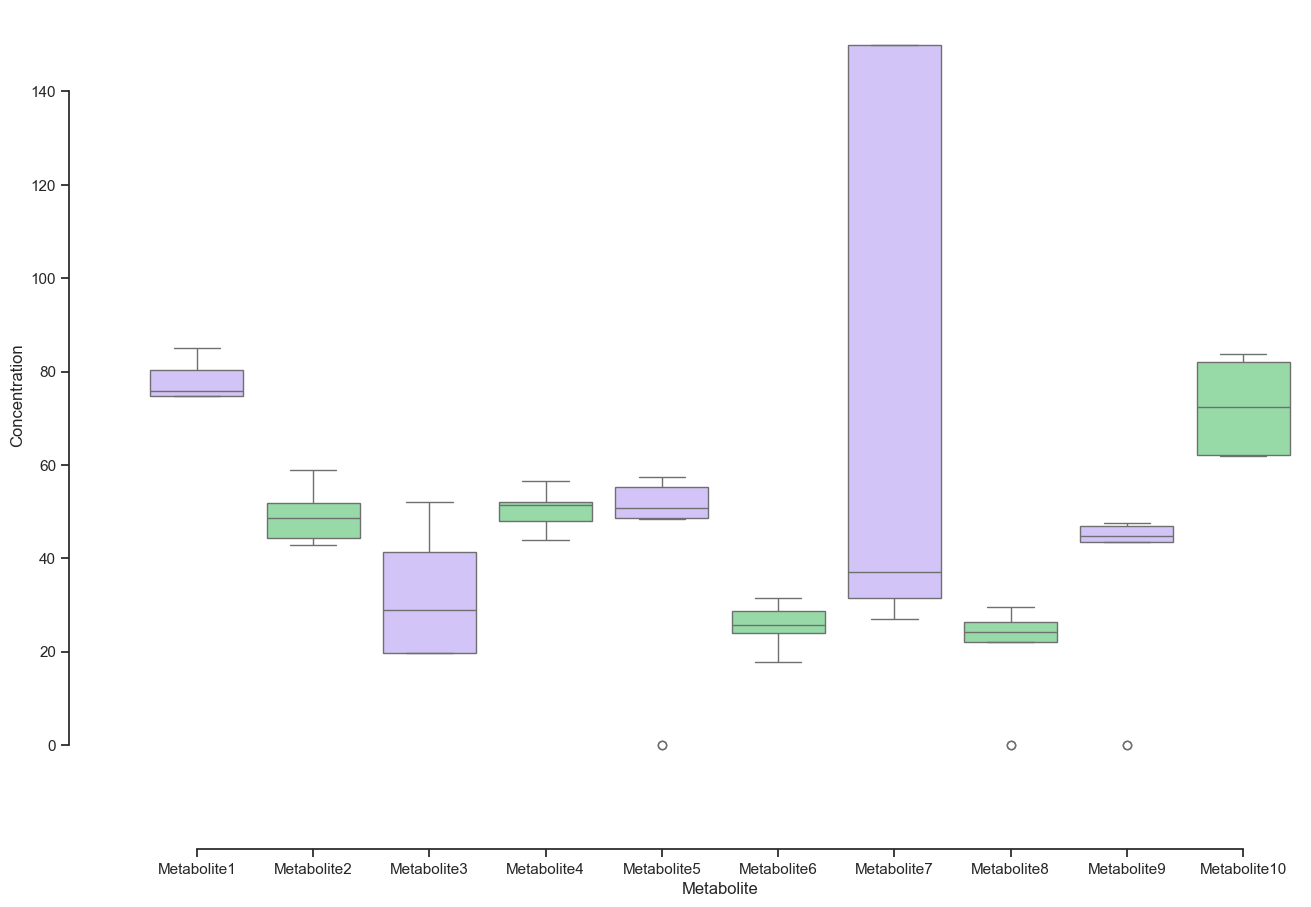

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
def plot_boxplot(df):

    plt.figure(figsize=(15, 10))
    tips=df

    sns.boxplot(x="Metabolite", y="Concentration",
             palette=["m", "g"],
            data=tips)
    
    sns.despine(offset=50, trim=True)


plot_boxplot(df_cleaned )

#### Bar plot using matplotlib

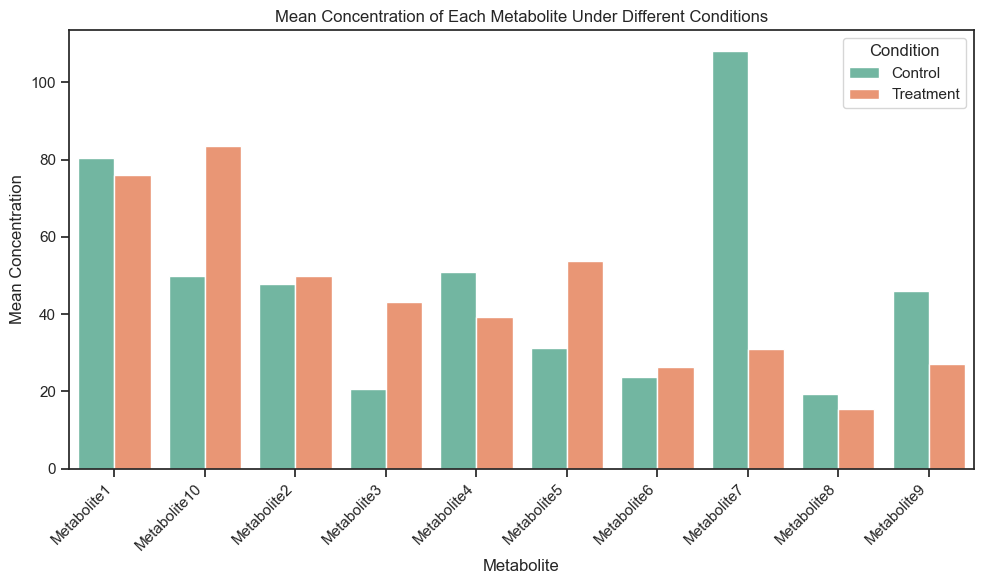

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Metabolite and Condition, and calculate mean Concentration
mean_concentration = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_concentration, x='Metabolite', y='Concentration', hue='Condition', palette='Set2')

# Customize plot
plt.title('Mean Concentration of Each Metabolite Under Different Conditions')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Concentration')
plt.tight_layout()

# Show plot
plt.show()

    

#### Interactive line plot using plotly

In [ ]:
import plotly.express as px
selected_metabolite = df['Metabolite'].unique()[3]  # choose  or change manually
filtered_df = df[df['Metabolite'] == selected_metabolite]

fig = px.line(filtered_df, x='Replicate', y='Concentration', color='Condition',
              title=f"Concentration Trends Across Replicates for {selected_metabolite}")
fig.show()


